## 1. Dataset Schema Analysis

We will use the following UCI dataset for this lesson and the related exercise.

**Dataset**: Heart Disease Dataset donated to UCI ML Dataset Repository https://archive.ics.uci.edu/ml/datasets/heart+Disease. The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

**Modeling Objective:** Predict the incidence of heart disease

Below is a list of areas that we will be looking for in our exploratory data analysis.
- Value Distributions - Is the dataset feature uniform, normal, skewed and severely unbalanced?
- Scale of Numerical Features
- Missing Values
- High Cardinality


**Dataset Schema**: The schema for the dataset that we will be using is on the page https://archive.ics.uci.edu/ml/datasets/heart+Disease  under the **"Attribute Information"** header. Please note that only 14 attributes are used and listed below
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:  3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    * Value 0: < 50% diameter narrowing
    * Value 1: > 50% diameter narrowing
    * Values >1: linking to attributes 59 through 68, which are vessels (we won't focus on this for this course)


### OPTIONAL- Use Tensorflow Data Validation (TFDV) for EDA

You are free to use your tool of choice to explore the data and create an EDA report at the end and TFDV currently has some bugs with the latest version of Chrome. The intention of this lesson is to expose you to TFDV as an option to explore your data. While there are other tools for exploratory data analysis, below are some reasons that TFDV can be helpful:
* Interactive and simple descriptive statistics visualization tool  
* Scales to large datasets
    * It uses "Apache Beam's data-parallel processing framework to scale the computation of statistics over large datasets."  
* Can be used to detect anomalies and drift with new data or differences between training and testing splits

Before building a machine learning model, we must first analyze the dataset and assess for common issues that may require preprocessing. We will use the TFDV library to help analyze and visualize the dataset. Some of the information has been adapted from the TFDV page(https://www.tensorflow.org/tfx/data_validation/get_started. 

**IMPORTANT** You must use the Chrome browser to see the TFDV library visualizations.

NOTE: Please note that there are other ways we can explore and analyze the data but we will focus on these areas for the course.


### ETL 

In [ ]:
# Import commonly used data science and visualization libraries: pandas, numpy, sklearn, seaborn, matplotlib.pyplot
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

**NOTE:** For this lesson and exercise we will use the processed not the raw dataset provided, so the categorical feature values have already been converted to numerical values.

For this exercise we will use the processed Cleveland Clinic dataset.

In [ ]:
# Summary:
# - This block loads the processed Cleveland heart disease dataset from a local file.
# - It defines the column names for the dataset as specified in the UCI repository.
# - The column_header_list determines which columns are included in the DataFrame; if the list is shorter than the actual data columns, extra columns will be excluded, and if longer, new columns will be filled with NaN.
# - The dataset is read into a pandas DataFrame using the specified column headers.
# - The DataFrame is assigned to the variable 'processed_cleveland_df' for further analysis.
#https://archive.ics.uci.edu/ml/datasets/heart+Disease, Cleveland dataset

processed_cleveland_path = "./data/processed.cleveland.txt"
column_header_list = [
    'age',
   'sex',
   'cp',
   'trestbps',
     'chol',
      'fbs',
      'restecg',
      'thalach',
       'exang',
      'oldpeak',
       'slope',
       'ca',
        'thal', 
     'num_label'
]
processed_cleveland_df = pd.read_csv(processed_cleveland_path, names=column_header_list)

In [8]:
processed_cleveland_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 2. Analyze Value Distributions

In [ ]:
# Summary:
# - This block defines a function to visualize the distribution of a categorical feature in a DataFrame.
# - It requires the user to pass a DataFrame and the name of a categorical column to visualize.
# - It uses pandas' value_counts() to count occurrences of each category.
# - The counts are plotted as a bar chart using matplotlib.
# - plt.show() displays the plot, and plt.close() closes the figure to free resources.

# visualize categorical distributions
def visualize_distributions(df, c):
    df[c].value_counts().plot(kind='bar')
    plt.show()
    plt.close()

Distribution for sex feature


<Axes: xlabel='sex'>

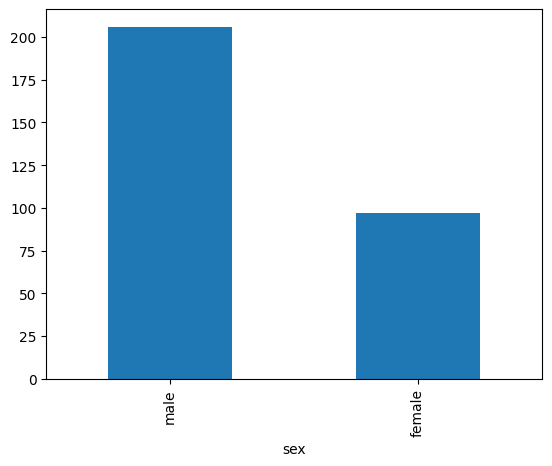

In [ ]:
# Summary:
# - This block visualizes the distribution of the 'sex' feature in the processed Cleveland heart disease dataset.
# - It sets the variable 'example_column1' to the string "sex".
# - It prints a message indicating which feature's distribution is being shown.
# - It replaces the numerical values in the 'sex' column (1 and 0) with the strings "male" and "female".
# - It calculates the value counts for each category ("male" and "female") and plots them as a bar chart using pandas' plot method.

example_column1 = "sex"
print("Distribution for {} feature".format(example_column1))
processed_cleveland_df[example_column1].replace({1:"male", 0:"female"}).value_counts().plot(kind='bar')

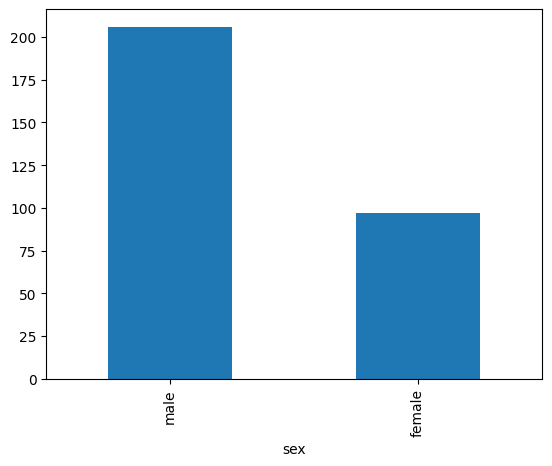

In [ ]:
#Using the function defined earlier to visualize the distribution of a categifcal feature
visualize_distributions(processed_cleveland_df.replace({1:"male", 0:"female"}), "sex")

Next, we will look at another categorical feature chest pain.

Distribution for cp feature


<Axes: ylabel='cp'>

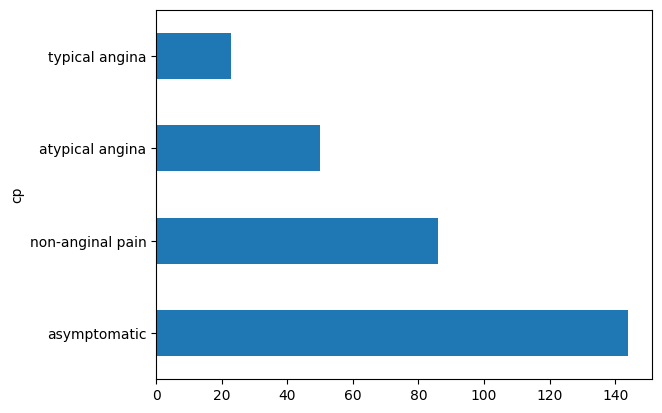

In [31]:
# Summary:
# - This block visualizes the distribution of the 'cp' (chest pain type) categorical feature in the processed Cleveland heart disease dataset.
# - It sets the variable 'example_column2' to the string "cp".
# - It prints a message indicating which feature's distribution is being shown.
# - It replaces the numerical values in the 'cp' column (1, 2, 3, 4) with descriptive string labels for each chest pain type.
# - It calculates the value counts for each chest pain type and plots them as a horizontal bar chart using pandas' plot method.

example_column2 = "cp"
print("Distribution for {} feature".format(example_column2))
processed_cleveland_df[example_column2].replace({1: "typical angina",
2: "atypical angina",
3: "non-anginal pain",
4: "asymptomatic" }).value_counts().plot(kind='barh')

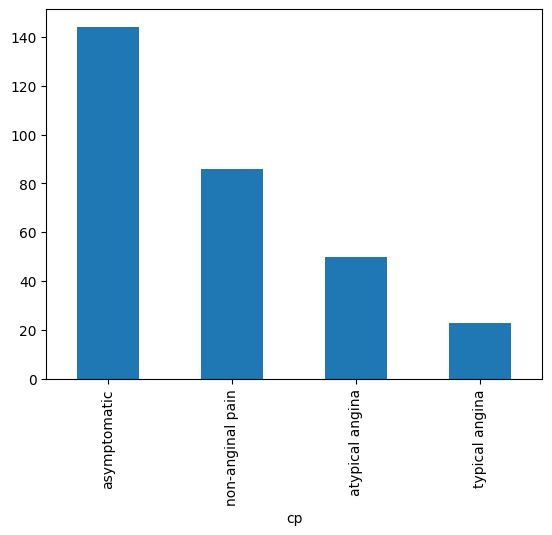

In [ ]:
# Using the function defined earlier to visualize the distribution of a categorical feature
# The replace method maps numeric category codes to descriptive labels for better readability in visualizations and analysis.

visualize_distributions(
    processed_cleveland_df.replace({
        1: "typical angina",
        2: "atypical angina",
        3: "non-anginal pain",
        4: "asymptomatic"
    }),
    "cp"
)

### Review of normal and uniform distributions

**Normal Distribution**

In [37]:
# Summary:
# - This block generates a normal distribution using numpy's random.normal function.
# - The mean (mu) and standard deviation (sigma) are set to 100 and 17.0, respectively.
# - 100 samples are drawn from the normal distribution and stored in the variable 'norm_dist'.

mu, sigma = 100, 17.0 # mean and standard deviation
norm_dist = np.random.normal(mu, sigma, 500)

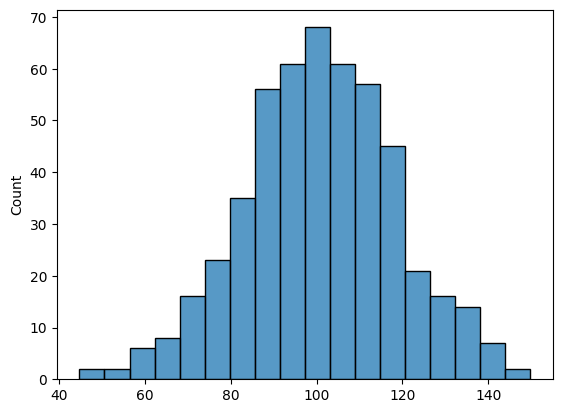

In [38]:
# Summary:
# - This block visualizes a normal distribution using seaborn's histplot.
# - 'norm_dist' is a numpy array containing 100 samples drawn from a normal distribution with mean 'mu' and standard deviation 'sigma'.
# - 'sns.histplot' is used to plot a histogram of 'norm_dist' without a kernel density estimate (kde=False).
# - 'plt.show()' displays the plot.

norm_ax = sns.histplot(norm_dist, kde=False)
plt.show()

**Uniform Distribution**

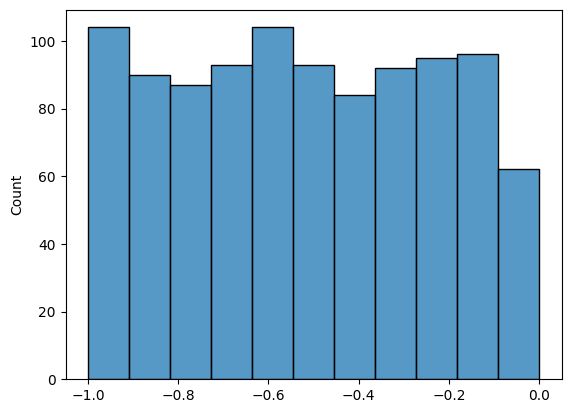

In [ ]:
# Summary:
# - This block generates a uniform distribution using numpy's random.uniform function.
# - It draws 1000 samples from a uniform distribution ranging from -1 to 0. 
uniform_dist = np.random.uniform(-1, 0, 1000)
uniform_ax = sns.histplot(uniform_dist, kde=False)
plt.show()

**Guess the type of distribution for the following?**

<Axes: >

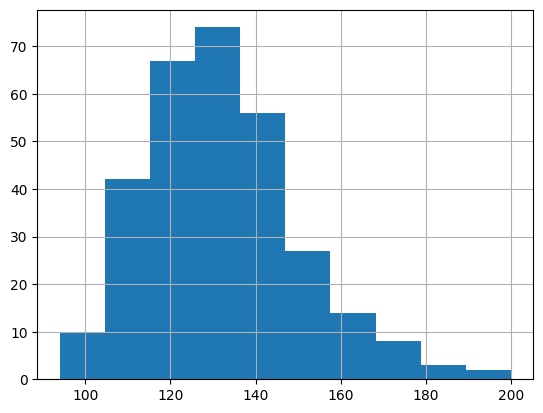

In [15]:
# numerical field histogram
processed_cleveland_df['trestbps'].hist()

It is a right-skewed Normal Distribution.

## 3. Missing Values

### Scaling of numerical features 
- Compare min and max and see if scale is large 

In [16]:
numerical_feature_list = ['age',  'trestbps', 'chol', 'thalach', 'oldpeak' ]

In [17]:
processed_cleveland_df[numerical_feature_list].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [18]:
# Missing values
def check_null_values(df):
    null_df = pd.DataFrame({'columns': df.columns, 
                            'percent_null': df.isnull().sum() * 100 / len(df), 
                           'percent_zero': df.isin([0]).sum() * 100 / len(df)
                           } )
    return null_df 

In [19]:
null_df = check_null_values(processed_cleveland_df)
null_df

,columns,percent_null,percent_zero
age,age,0.0,0.000000
sex,sex,0.0,32.013201
cp,cp,0.0,0.000000
trestbps,trestbps,0.0,0.000000
chol,chol,0.0,0.000000
fbs,fbs,0.0,85.148515
restecg,restecg,0.0,49.834983
thalach,thalach,0.0,0.000000
exang,exang,0.0,67.326733
oldpeak,oldpeak,0.0,32.673267


## 4. Outliers

<Axes: ylabel='age'>

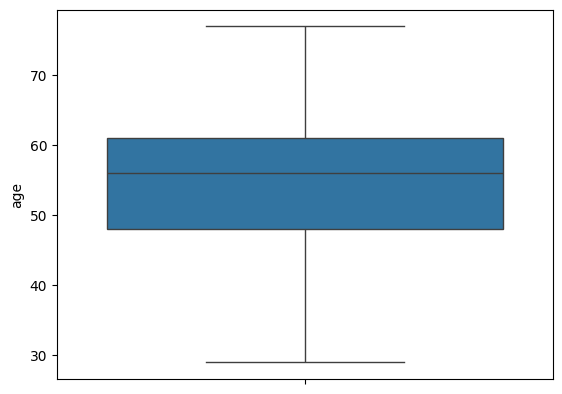

In [20]:
sns.boxplot(y=processed_cleveland_df['age'])

<Axes: ylabel='chol'>

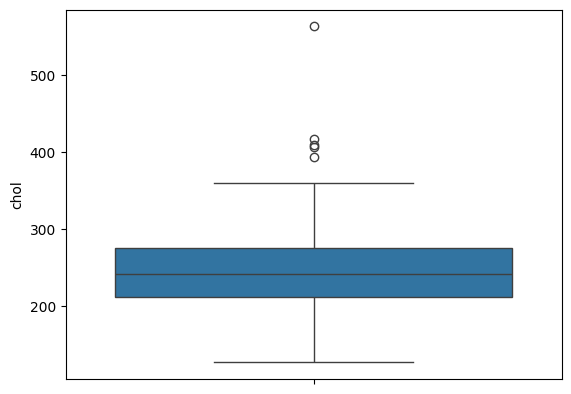

In [21]:
sns.boxplot(y=processed_cleveland_df['chol'])

## 5. High Cardinality

In [41]:
# Summary:
# - Imports the numpy library as np for numerical operations.
# - Defines a function 'create_cardinality_feature' that takes a DataFrame and returns a random array of codes (integers from 100 to 999) with length equal to the number of rows in the DataFrame.
# - Defines a function 'count_unique_values' that:
#   - Takes a DataFrame and a list of categorical column names.
#   - Selects the specified categorical columns from the DataFrame.
#   - Adds a new column 'principal_diagnosis_code' with high cardinality random codes.
#   - Creates a DataFrame summarizing the number of unique values (cardinality) for each column.
#   - Returns this summary DataFrame.

import numpy as np
def create_cardinality_feature(df):
    num_rows = len(df)
    random_code_list = np.arange(100, 1000, 1)
    return np.random.choice(random_code_list, num_rows)
    
def count_unique_values(df, cat_col_list):
    cat_df = df[cat_col_list]
    cat_df['principal_diagnosis_code'] = create_cardinality_feature(cat_df)
    #add feature with high cardinality
    val_df = pd.DataFrame({'columns': cat_df.columns, 
                       'cardinality': cat_df.nunique() } )
    return val_df

In [42]:
categorical_feature_list = [ 'sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [43]:
val_df = count_unique_values(processed_cleveland_df, categorical_feature_list) 
val_df

/var/folders/sy/nnrjh0cx1897yr6m0_fq9wmc0000gq/T/ipykernel_17597/1661027370.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['principal_diagnosis_code'] = create_cardinality_feature(cat_df)


,columns,cardinality
sex,sex,2
cp,cp,4
restecg,restecg,3
exang,exang,2
slope,slope,3
ca,ca,5
thal,thal,4
principal_diagnosis_code,principal_diagnosis_code,265


# 6. Demographic Analysis

In [25]:
#convert age to bins
demo_features = ['sex',  'age' ]
demo_df = processed_cleveland_df[demo_features].replace({1:"male", 0:"female"})
age_bins = np.arange(0, 90, 10)
a_bin = [str(x) for x in np.arange(0, 90, 10) ]
age_labels = ["".join(x) for x in zip( [x + " - " for x in a_bin[:-1]], a_bin[1:])]
demo_df['age_bins'] = pd.cut(demo_df['age'], bins=age_bins, labels=age_labels)

In [26]:
demo_df

,sex,age,age_bins
0,male,63.0,60 - 70
1,male,67.0,60 - 70
2,male,67.0,60 - 70
3,male,37.0,30 - 40
4,female,41.0,40 - 50
...,...,...,...
298,male,45.0,40 - 50
299,male,68.0,60 - 70
300,male,57.0,50 - 60
301,female,57.0,50 - 60


### Group by Age Bins

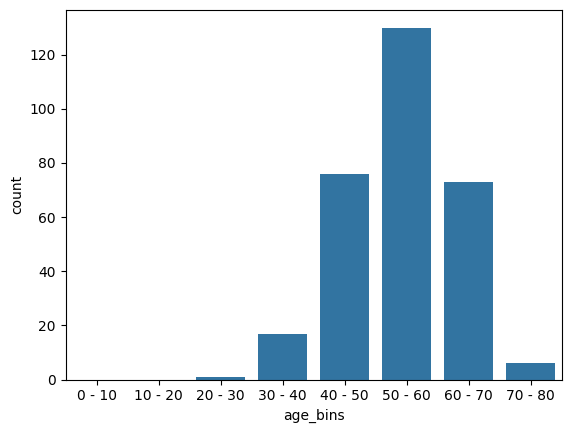

In [27]:
ax = sns.countplot(x="age_bins", data=demo_df)

### Group by Gender and Age Bins

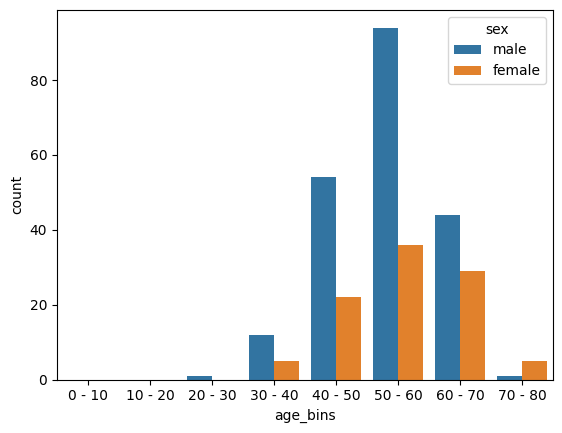

In [28]:
ax = sns.countplot(x="age_bins", hue="sex", data=demo_df)